<a href="https://colab.research.google.com/github/MrvZzZzZ/Lab2_AI_for_study/blob/main/%D0%9B%D0%B0%D0%B1%D0%B0_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown

file_id = "16_vcWLYlU_q7zf6nBny0M-aLCPwF3Qq2"
url = f"https://drive.google.com/uc?id={file_id}"
output = "fake.csv"

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=16_vcWLYlU_q7zf6nBny0M-aLCPwF3Qq2
To: /content/fake.csv
100%|██████████| 62.8M/62.8M [00:01<00:00, 57.7MB/s]


'fake.csv'

In [2]:
file_id = "1jgD9OgMsiHz-2Ww9_00nhiegqubaQ6l2"
url = f"https://drive.google.com/uc?id={file_id}"
output = "true.csv"

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1jgD9OgMsiHz-2Ww9_00nhiegqubaQ6l2
To: /content/true.csv
100%|██████████| 53.6M/53.6M [00:01<00:00, 50.0MB/s]


'true.csv'

In [8]:
import pandas as pd

df_fake = pd.read_csv("./fake.csv")
df_true = pd.read_csv("./true.csv")
df = pd.concat([df_fake, df_true], ignore_index=True)

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download("stopwords", quiet=True)
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

news = df.drop(columns=["subject", "date"]).copy()
news["content"] = (
    news["title"]
    + " — "
    + news["text"]
).str.strip().copy()
news = news.drop(columns=["title", "text"])

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|@\w+|\d+", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stop_words and len(w) > 2]
    return " ".join(words)

news["content"] = news["content"].apply(preprocess_text)
news["content"].head()

,content
0,donald trump send embarrass new year eve messa...
1,drunk brag trump staffer start russian collus ...
2,sheriff david clark becom internet joke threat...
3,trump obsess even obama name code websit imag ...
4,pope franci call donald trump christma speech ...


In [10]:
news["content"][0]

'donald trump send embarrass new year eve messag disturb donald trump wish american happi new year leav instead give shout enemi hater dishonest fake news media former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year great year america donald trump decemb trump tweet went welll expect kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan decemb one like calvin decemb impeach would make great year america also accept regain control congress miranda yaver decemb hear talk includ mani peopl hate wonder hate alan sandov decemb use word hater new year wish marlen decemb say happi new year koren 

In [11]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = model.encode(
    news["content"].tolist(),
    show_progress_bar=True,
    convert_to_numpy=True
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1404 [00:00<?, ?it/s]

In [ ]:
embeddings.shape

(23481, 384)

In [13]:
import numpy as np
import os

OUTPUT_DIR = "/content/drive/MyDrive/Lab2/part1/chekpoints"

os.makedirs(OUTPUT_DIR, exist_ok=True)

output_path = os.path.join(OUTPUT_DIR, "news_embeddings.npz")

np.savez_compressed(
    output_path,
    embeddings=embeddings,
    content=news["content"].values,
    original=df["title"] + " — " + df["text"],
    index=news.index.values
)

print(f"Файл сохранён: {output_path}")

Файл сохранён: /content/drive/MyDrive/Lab2/part1/checkpoints/news_embeddings.npz


In [39]:
import gdown

file_id = "1z0t5176GC0jh5StMlTdU9lpp476mSIRK"
url = f"https://drive.google.com/uc?id={file_id}"
output = "news_embeddings.npz"

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1z0t5176GC0jh5StMlTdU9lpp476mSIRK
From (redirected): https://drive.google.com/uc?id=1z0t5176GC0jh5StMlTdU9lpp476mSIRK&confirm=t&uuid=419d705d-f520-47d9-a464-eec248151389
To: /content/news_embeddings.npz
100%|██████████| 130M/130M [00:03<00:00, 39.5MB/s]


'news_embeddings.npz'

In [14]:
import numpy as np

data = np.load(output_path, allow_pickle=True)
embeddings = data["embeddings"]
content = data["content"]
original = data["original"]

In [15]:
!pip install umap-learn hdbscan matplotlib plotly bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.1 MB/s eta 0:00:00


In [16]:
import umap

umap_model = umap.UMAP(
    n_neighbors=15,
    n_components=5,
    min_dist=0.0,
    metric='cosine',
    random_state=42,
    verbose=False
)
umap_embeddings = umap_model.fit_transform(embeddings)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [17]:
import os
import joblib

os.makedirs(OUTPUT_DIR, exist_ok=True)

umap_model_path = os.path.join(OUTPUT_DIR, "umap_model.pkl")
with open(umap_model_path, 'wb') as f:
    joblib.dump(umap_model, f)

In [37]:
import joblib

file_id = "13_YfD9_7EFRw0z8awD8Lxb8AvDz_jHSW"
url = f"https://drive.google.com/uc?id={file_id}"
output = "umap_model.pkl"

gdown.download(url, output, quiet=False)
umap_model = joblib.load("umap_model.pkl")

Downloading...
From (original): https://drive.google.com/uc?id=13_YfD9_7EFRw0z8awD8Lxb8AvDz_jHSW
From (redirected): https://drive.google.com/uc?id=13_YfD9_7EFRw0z8awD8Lxb8AvDz_jHSW&confirm=t&uuid=1fd4be94-6ab3-4f02-9351-9a5c1393f182
To: /content/umap_model.pkl
100%|██████████| 284M/284M [00:08<00:00, 32.3MB/s]


In [18]:
import hdbscan
import pandas as pd

clusterer = hdbscan.HDBSCAN(
    min_cluster_size=50,
    min_samples=15,
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True
)
cluster_labels = clusterer.fit_predict(umap_embeddings)
outlier_scores = clusterer.outlier_scores_
news = pd.DataFrame({
    "content": content,
    "original": original,
})
news["cluster"] = cluster_labels
news["outlier_score"] = outlier_scores

n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_outliers = (cluster_labels == -1).sum()
print(f"Найдено {n_clusters} кластеров и {n_outliers} выбросов ({n_outliers/len(content):.1%})")

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


Найдено 193 кластеров и 12657 выбросов (28.2%)


In [19]:
import os
import joblib

os.makedirs(OUTPUT_DIR, exist_ok=True)

joblib.dump(clusterer, os.path.join(OUTPUT_DIR, "hdbscan_model.joblib"))

['/content/drive/MyDrive/Lab2/part1/checkpoints/hdbscan_model.joblib']

In [38]:
file_id = "1VGFfIeu6LX3ArtbMObcQRCT8K9qbi3vF"

url = f"https://drive.google.com/uc?id={file_id}"
output = "hdbscan_model.pkl"

gdown.download(url, output, quiet=False)
clusterer = joblib.load("hdbscan_model.pkl")

Downloading...
From: https://drive.google.com/uc?id=1VGFfIeu6LX3ArtbMObcQRCT8K9qbi3vF
To: /content/hdbscan_model.pkl
100%|██████████| 9.92M/9.92M [00:00<00:00, 29.3MB/s]


In [20]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

topic_model = BERTopic(
    embedding_model='all-MiniLM-L6-v2',
    umap_model=umap_model,
    hdbscan_model=clusterer,
    vectorizer_model=CountVectorizer(stop_words="english", ngram_range=(1, 2)),
    min_topic_size=20,
    nr_topics="auto",
    calculate_probabilities=True,
    verbose=True
)

topics, probs = topic_model.fit_transform(original)
news["topic"] = topics
news["topic_prob"] = [p.max() if len(p) > 0 else 0 for p in probs]

2025-12-30 12:01:05,123 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1404 [00:00<?, ?it/s]

2025-12-30 13:18:39,395 - BERTopic - Embedding - Completed ✓
2025-12-30 13:18:39,400 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-30 13:19:47,432 - BERTopic - Dimensionality - Completed ✓
2025-12-30 13:19:47,437 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-30 13:21:58,614 - BERTopic - Cluster - Completed ✓
2025-12-30 13:21:58,616 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-12-30 13:23:15,390 - BERTopic - Representation - Completed ✓
2025-12-30 13:23:15,553 - BERTopic - Topic reduction - Reducing number of topics
2025-12-30 13:23:15,672 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-30 13:24:25,719 - BERTopic - Representation - Completed ✓
2025-12-30 13:24:25,891 - BERTopic - Topic reduction - Reduced number of topics from 213 to 21


In [35]:
import os
import joblib
OUTPUT_DIR = "/content/drive/MyDrive/Lab2/part1/chekpoints1"
os.makedirs(OUTPUT_DIR, exist_ok=True)

joblib.dump(topic_model, os.path.join(OUTPUT_DIR, "bertopic_model"))

['/content/drive/MyDrive/Lab2/part1/chekpoints1/bertopic_model']

In [29]:
loaded_model = BERTopic.load("/content/drive/MyDrive/Lab2/part1/checkpoints/bertopic_model")

In [36]:
file_id = "1LkJijNS0FF1KfVnTA3BRlK3cL23002ZF"

url = f"https://drive.google.com/uc?id={file_id}"
output = "bertopic_model"

gdown.download(url, output, quiet=False)
topic_model = BERTopic.load("bertopic_model")

Downloading...
From (original): https://drive.google.com/uc?id=1LkJijNS0FF1KfVnTA3BRlK3cL23002ZF
From (redirected): https://drive.google.com/uc?id=1LkJijNS0FF1KfVnTA3BRlK3cL23002ZF&confirm=t&uuid=dfb29ab0-377e-425e-8e3c-5cfd20e7a8e5
To: /content/bertopic_model
100%|██████████| 601M/601M [00:15<00:00, 39.6MB/s]


In [22]:
topic_stats = news.groupby("topic").agg(
    total=("topic", "size"),
    outliers=("cluster", lambda x: (x == -1).sum()),
    outlier_rate=("cluster", lambda x: (x == -1).mean()),
    mean_outlier_score=("outlier_score", "mean")
).sort_values("outlier_rate", ascending=False)

suspicious_topics = topic_stats.head(10)
print("Топ-5 тем с наибольшей долей выбросов:")
for topic_id, row in suspicious_topics.head(5).iterrows():
    words = ", ".join([w for w, _ in topic_model.get_topic(topic_id)[:5]])
    print(f"Тема {topic_id:>3}: {row['outlier_rate']:.1%} выбросов | [{words}]")

Топ-5 тем с наибольшей долей выбросов:
Тема  18: 55.6% выбросов | [najib, 1mdb, malaysia, said, malaysian]
Тема  -1: 44.2% выбросов | [trump, said, president, people, obama]
Тема   6: 35.0% выбросов | [duterte, philippines, drugs, police, manila]
Тема   4: 29.4% выбросов | [italy, star, malta, berlusconi, caruana]
Тема   0: 22.0% выбросов | [trump, said, president, people, state]


In [23]:
# Комбинированный скор: аномальность + уверенность в теме
news["fake_score"] = (
    0.6 * news["outlier_score"] +
    0.3 * (1 - news["topic_prob"]) +  # низкая уверенность в теме → подозрительно
    0.1 * (news["cluster"] == -1).astype(int)
)

top_suspicious = news.nlargest(200, "fake_score")[
    ["content", "fake_score", "outlier_score", "topic", "cluster", "topic_prob"]
]

top_suspicious.to_csv("suspicious_news.csv", index=False)

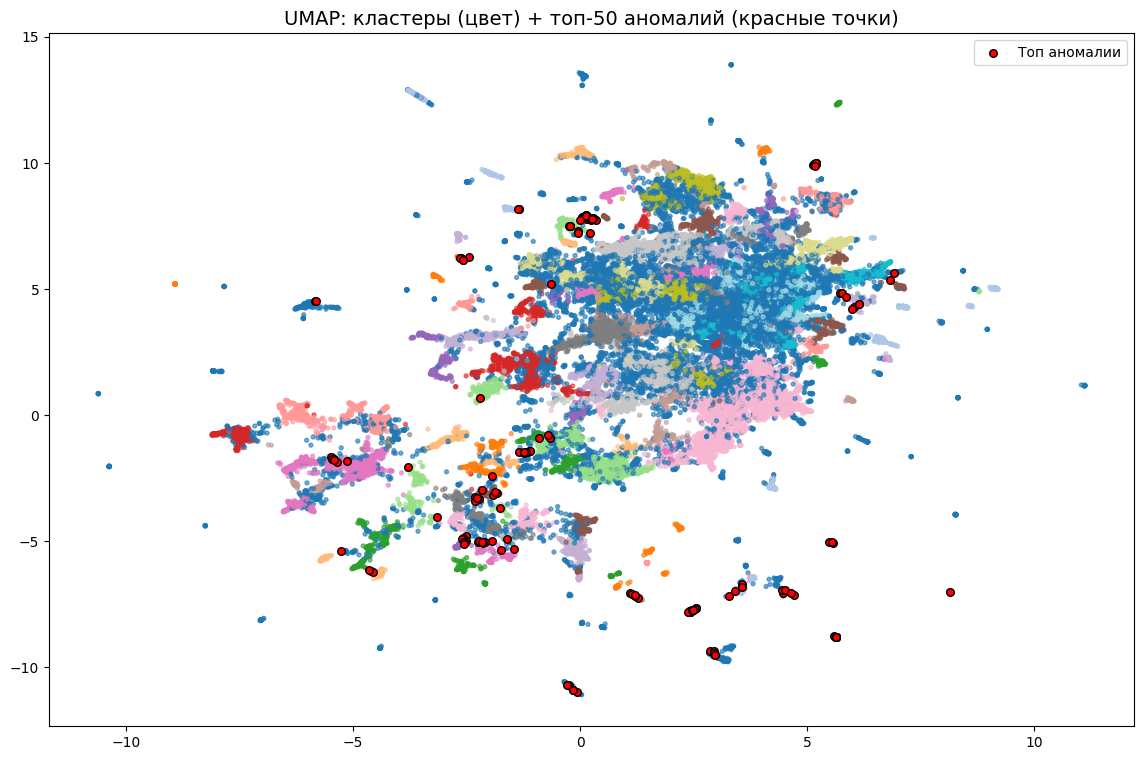

In [24]:
import matplotlib.pyplot as plt

# 2D-UMAP для графика
umap_2d = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.1, metric='cosine', random_state=42)
X_2d = umap_2d.fit_transform(embeddings)

plt.figure(figsize=(14, 9))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=news["cluster"], cmap='tab20', s=8, alpha=0.6)

top_idx = news.nlargest(200, "outlier_score").index
plt.scatter(X_2d[top_idx, 0], X_2d[top_idx, 1], c='red', s=30, label='Топ аномалии', edgecolor='k')

plt.legend()
plt.title("UMAP: кластеры (цвет) + топ-50 аномалий (красные точки)", fontsize=14)
plt.savefig("umap_suspicious.png", dpi=150)
plt.show()